In [1]:
import pandas as pd
import numpy as np
import cv2

In [2]:
data=pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def generate_img(sample,img):
    columns=data.columns[1:]
    columns=[int(i.replace('pixel',''))for i in columns]
    for i in columns:
        row=int(i/28)
        col=i%28
        val=sample[i]
        img[row][col]=[val]
    return img


In [5]:
columns=data.columns[1:]
columns=[int(i.replace('pixel',''))for i in columns]
imgs=list()
for i in range(0,len(data)):
    sample=data.loc[i,:].values
    img = np.zeros((28, 28, 1), dtype = np.uint8)
    img=generate_img(sample,img)
    imgs.append(img)
labels=np.asarray(data['label'])

1
(28, 28, 1)


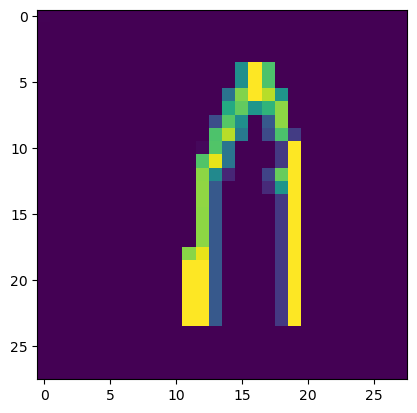

In [6]:
import matplotlib.pyplot as plt
import random
val=random.randint(0,10240)
print(labels[val])
print(imgs[val].shape)
plt.imshow(imgs[val])


In [7]:
len(imgs)
len(labels)

60000

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs,labels,test_size=0.3,random_state=42)


In [9]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [10]:
def prep_pixels(train, test):
    # convert from integers to floats
    train=np.array(train)
    test=np.array(test)
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [11]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [12]:
X_train, X_test, y_train, y_test = train_test_split(imgs,labels,test_size=0.3,random_state=42)
X_train,X_test=prep_pixels(X_train,X_test)
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)
model = define_model()
history=model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
1313/1313 [==============================] - 12s 3ms/step - loss: 0.1184 - accuracy: 0.9644
Epoch 2/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0427 - accuracy: 0.9869
Epoch 3/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0264 - accuracy: 0.9920
Epoch 4/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0164 - accuracy: 0.9951
Epoch 5/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0124 - accuracy: 0.9960
Epoch 6/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0084 - accuracy: 0.9980
Epoch 7/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0067 - accuracy: 0.9982
Epoch 8/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0049 - accuracy: 0.9988
Epoch 9/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0030 - accuracy: 0.9995
Epoch 10/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.00

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


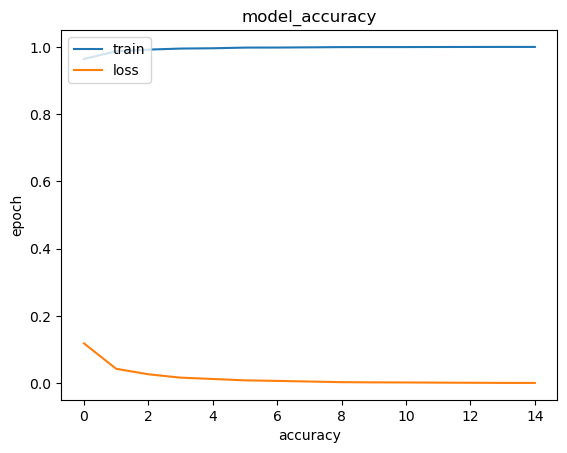

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model_accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','loss'],loc='upper left')
plt.show()

In [15]:
scores = model.evaluate(X_test,y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.0298 - accuracy: 0.9923


Generate a prediction
1/1 [==============================] - 0s 113ms/step
prediction is: 3


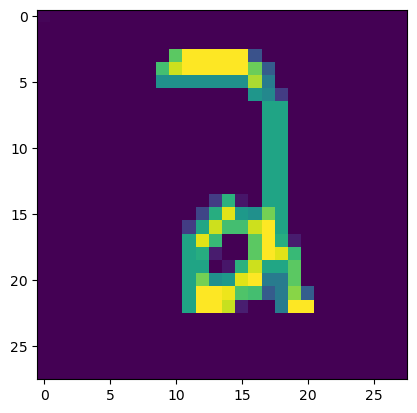

In [16]:
val=random.randint(0,18000)
print("Generate a prediction")
prediction = model.predict(np.array([X_test[val]]))
sample=X_test[val]
print("prediction is:",prediction.argmax())
plt.imshow(sample)


In [17]:
# SUBMISSION
TEST=pd.read_csv("/kaggle/input/Kannada-MNIST/test.csv")

In [18]:
TEST.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
columns=TEST.columns[1:]
columns=[int(i.replace('pixel',''))for i in columns]
test_imgs=list()
for i in range(0,len(TEST)):
    sample=TEST.loc[i,:].values
    img = np.zeros((28, 28, 1), dtype = np.uint8)
    img=generate_img(sample,img)
    test_imgs.append(img)


In [20]:
print(np.array(test_imgs).shape)


(5000, 28, 28, 1)


In [21]:
ans_dict={'id':list(),'label':list()}
for i in range(0,len(TEST)):
    sample=test_imgs[i]
    lable=model.predict(np.array([sample]),verbose=1).argmax()
    ans_dict['id'].append(i)
    ans_dict['label'].append(lable)
    

1/1 [==============================] - 0s 20ms/step


In [22]:
ANSWERS=pd.DataFrame.from_dict(ans_dict)


In [23]:
ANSWERS.set_index('id')

,label
id,
0,3
1,0
2,2
3,6
4,7
...,...
4995,1
4996,1
4997,1


In [24]:
ANSWERS.to_csv('submission.csv',index=False)